### An implementation of a simple neural network

#### Data Loading and Network Setup

In [3]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from data_loader import MnistDataloader
from IPython.display import display, clear_output

print("Loading dataset...")
mnist_dataloader = MnistDataloader("data/MNIST/raw")
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train_images = np.array(x_train) # 60000 x 28 x 28
y_train = np.array(y_train) # 60000
x_test_images = np.array(x_test)   # 10000 x 28 x 28
y_test = np.array(y_test)   # 10000

# Convert tensor to lower dimension and normalize
print("Reshaping dataset...")
x_train = x_train_images.reshape(x_train_images.shape[0], -1) # 60000 x 784
x_train = x_train / 255.0
x_test = x_test_images.reshape(x_test_images.shape[0], -1)    # 10000 x 784
x_test = x_test / 255.0

# Apply one-hot-coding to labels
y_train_hot = np.zeros((y_train.size, 10))
y_train_hot[np.arange(y_train.size), y_train] = 1   # 60000 x 10
y_test_hot = np.zeros((y_test.size, 10))
y_test_hot[np.arange(y_test.size), y_test] = 1      # 10000 x 10

# Construct network
print("Creating network...")
layer_1 = 128
layer_2 = 10
weights_1 = np.random.randn(x_train.shape[1], layer_1) * 0.01  # 784 x 128
biases_1 = np.zeros(layer_1)                                   # 128
weights_2 = np.random.randn(layer_1, layer_2) * 0.01           # 128 x 10
biases_2 = np.zeros(layer_2)                                   # 10
print("Done")

Loading dataset...


Reshaping dataset...
Creating network...
Done


#### Network Training

'Training 59000 of 60000 done.'

[0.010233029932191093, 0.00011981069739940673, 0.012135221158239553, 0.0012172017086263596, 0.014497702168212914, 0.001220192406267123, 0.00022540366603659886, 4.054954251490078e-06, 0.003217233128521288, 5.489652105247131e-05, 0.00021326866433178863, 0.015483722610801253, 6.978084925410184e-07, 0.005105528191842903, 0.004049063353979378, 0.002902082314387953, 0.01897330997410808, 0.0005440651935459317, 0.25055868937548736, 0.011611216853452028, 2.3472269672285348e-05, 0.00033523636189002894, 0.0678808789484633, 0.0010017905927110745, 0.4837210984836798, 0.25931773987747886, 0.008214870456644605, 1.5217665856672244e-06, 0.010706196735658114, 2.8535576482612646, 0.15084942863570602, 0.003866722737239288, 0.004248277323555545, 0.011892131502836514, 0.0003199953690002637, 0.008374956994065244, 0.0012219221754621336, 3.963541387814401e-05, 0.028108791145497938, 0.036685046154080796, 0.0012654783984489245, 0.00022783582620377886, 0.05236449397069851, 0.002328045413497019, 0.0004488029290527

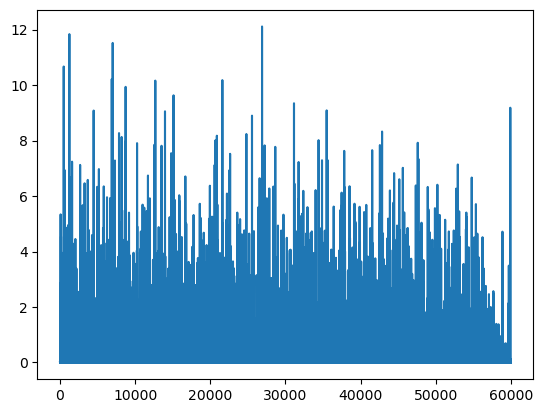

In [4]:
# ReLU activation function
def relu(vector):
    return np.maximum(0, vector)


# Derivative function of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)


# Softmax activation function
def softmax(vector):
    exp_vector = np.exp(vector)
    return exp_vector / np.sum(exp_vector)


# Cross entropy loss function
def ce_loss(output_vector, label_vector):
    return -np.sum(label_vector * np.log(output_vector))

# Run network
learning_rate = 0.01
for index in range(x_train.shape[0]):
    if index != 0 and index % 1000 == 0:
        clear_output(wait=True)
        display(f"Training {index} of {x_train.shape[0]} done.")

    # Forward pass
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)

    # Backward pass
    d_output_2 = output_2 - y_train_hot[index]  # Combined derivative of softmax and ce loss
    d_loss_weights_2 = np.outer(output_1, d_output_2)
    d_output_1 = np.dot(weights_2, d_output_2) * relu_derivative(output_1)
    d_loss_weights_1 = np.outer(x_train[index], d_output_1)

    weights_2 -= learning_rate * d_loss_weights_2
    biases_2 -= learning_rate * d_output_2
    weights_1 -= learning_rate * d_loss_weights_1
    biases_1 -= learning_rate * d_output_1

# Calculate losses
losses = []
for index in range(x_train.shape[0]):
    output_1 = relu(np.dot(x_train[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    losses.append(ce_loss(output_2, y_train_hot[index]))

print(losses)
print(np.mean(losses))
plt.plot(losses)
print("Done")

In [5]:
import pickle
pickle.dump([
    weights_1,
    biases_1,
    weights_2,
    biases_2
], open("tmp.pickle", "wb"))

#### Test Network

[0.0004649671082119828, 0.03334831344235382, 0.003343630117576572, 6.0170723208537966e-05, 0.012846964154181802, 0.0014115552285086932, 0.000633045220194244, 0.020111751444909183, 0.6146132217774702, 0.028069816322965253, 0.00010173110548550895, 0.04112004381681705, 0.003176371072364031, 1.1026352152845297e-05, 0.00025641380342271837, 0.013595285156195723, 0.0005909991308002221, 0.00043722032140879513, 0.06653851870535711, 0.00043648520740595994, 0.003865930858307072, 0.1380989458697136, 0.0032794184609219804, 0.00013091115227743946, 0.010507614469560658, 4.786690531071121e-06, 0.020996544921512313, 0.0012614797618802907, 1.0234780504852835e-05, 0.004963699085455967, 0.004434669362411404, 0.014422289133932523, 0.0005662583685115068, 0.635057718147221, 0.00680933941312071, 0.0013403364745557984, 0.009745546742299646, 0.0013522360373685368, 0.8064471505953725, 0.0013401701538884106, 0.008624802876774246, 0.033695358337011636, 0.0015370559433722107, 0.01095028669815285, 0.0415627210574101

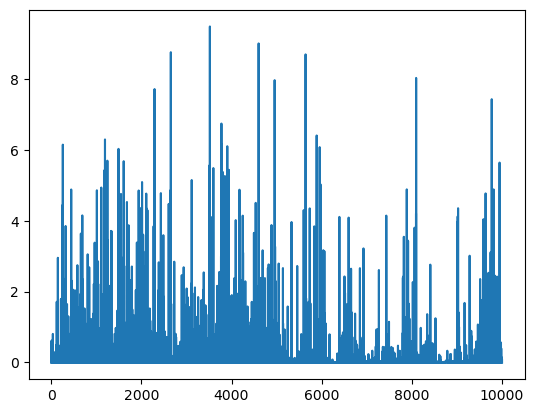

In [6]:
test_outputs = []
test_losses = []
for index in range(x_test.shape[0]):
    output_1 = relu(np.dot(x_test[index], weights_1) + biases_1)
    output_2 = softmax(np.dot(output_1, weights_2) + biases_2)
    loss = ce_loss(output_2, y_test_hot[index])
    test_outputs.append(output_2)
    test_losses.append(loss)

print(test_losses)
print(np.mean(test_losses))
plt.plot(test_losses)

Index of max value: 3520
Accuracy: 95.85000000000001 %
Label:  2 - Prediction: 2 -> True


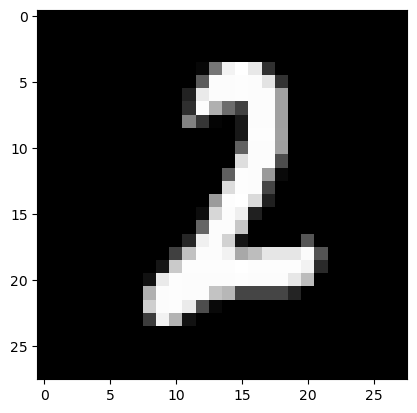

<BarContainer object of 10 artists>

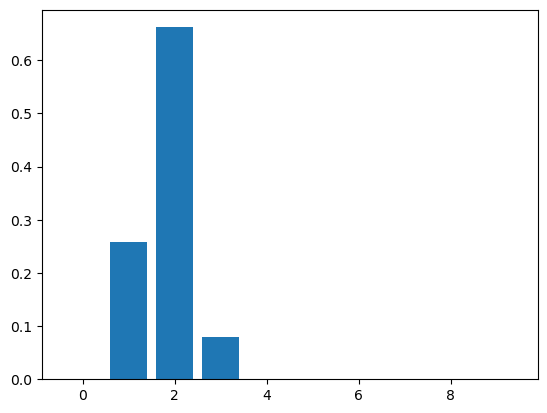

In [7]:
# Print max value index
max_index = test_losses.index(max(test_losses))
print("Index of max value:", max_index)

# Print accuracy
hits = [np.argmax(test_outputs[index]) == y_test[index] for index in range(len(x_test))]
print("Accuracy:", sum(hits) / len(hits) * 100, "%")

# Plotting the bar chart
index = 2296
print("Label: ", y_test[index], "- Prediction:", np.argmax(test_outputs[index]), "->", hits[index])
plt.imshow(x_test_images[index], cmap=plt.cm.gray)
plt.show()
plt.bar(range(len(test_outputs[index])), test_outputs[index])
